In [139]:
#import dependecies

%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [140]:
#read Steam csv
game_df = pd.read_csv("games.csv")
game_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [141]:
#read columns
game_df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [231]:
#take mean of 'Estimated owners' and create new column 
vg_eo = game_df['Estimated owners'].apply(lambda x: (int(x.split(' - ')[0]) + int(x.split(' - ')[1]))/2)
game_df['Estimated Owners'] = vg_eo
game_df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Estimated Owners,year,month,day
36165,282010,Carmageddon Max Pack,1997-06-30,100000 - 200000,6,0,9.99,0,Carmageddon is the original freeform driving s...,['English'],...,THQ Nordic,"Single-player,Multi-player,Steam Trading Cards","Action,Indie,Racing","Combat Racing,Racing,Action,Classic,Indie,Gore...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,150000.0,1997,6,30
22217,232770,POSTAL,1997-11-14,5000000 - 10000000,30,18,0.00,0,Take control of The Postal Dude in his infamou...,['English'],...,Running With Scissors,"Single-player,Steam Achievements,Full controll...","Action,Indie","Horror,Twin Stick Shooter,Top-Down Shooter,Vil...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,1997,11,14
49557,70,Half-Life,1998-11-08,5000000 - 10000000,752,0,9.99,1,Named Game of the Year by over 50 publications...,"['English', 'French', 'German', 'Italian', 'Sp...",...,Valve,"Single-player,Multi-player,PvP,Online PvP,Stea...",Action,"FPS,Singleplayer,Sci-fi,Multiplayer,1990's,Act...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,1998,11,8
19555,20,Team Fortress Classic,1999-04-01,5000000 - 10000000,110,0,4.99,0,One of the most popular online action games of...,"['English', 'French', 'German', 'Italian', 'Sp...",...,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,1999,4,1
17218,224920,Legacy of Kain: Soul Reaver,1999-09-08,500000 - 1000000,4,17,0.00,0,"As Raziel, stalk the shadows of Nosgoth preyin...",['English'],...,Square Enix,Single-player,"Action,Adventure","Adventure,Action,Vampire,Classic,Story Rich,Da...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,750000.0,1999,9,8


In [232]:
#convert 'Release date' to datetime format
game_df['Release date'] = pd.to_datetime(game_df['Release date'])

# Extract the year, month, and day values into separate columns
game_df['year'] = game_df['Release date'].dt.year
game_df['month'] = game_df['Release date'].dt.month
game_df['day'] = game_df['Release date'].dt.day

#check datatypes and ensure 'Release date' values can be sorted
print(game_df.dtypes)
game_df.sort_values('Release date',inplace=True)
game_df.head(15)

AppID                                  int64
Name                                  object
Release date                  datetime64[ns]
Estimated owners                      object
Peak CCU                               int64
Required age                           int64
Price                                float64
DLC count                              int64
About the game                        object
Supported languages                   object
Full audio languages                  object
Reviews                               object
Header image                          object
Website                               object
Support url                           object
Support email                         object
Windows                                 bool
Mac                                     bool
Linux                                   bool
Metacritic score                       int64
Metacritic url                        object
User score                             int64
Positive  

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Publishers,Categories,Genres,Tags,Screenshots,Movies,Estimated Owners,year,month,day
36165,282010,Carmageddon Max Pack,1997-06-30,100000 - 200000,6,0,9.99,0,Carmageddon is the original freeform driving s...,['English'],...,THQ Nordic,"Single-player,Multi-player,Steam Trading Cards","Action,Indie,Racing","Combat Racing,Racing,Action,Classic,Indie,Gore...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,150000.0,1997,6,30
22217,232770,POSTAL,1997-11-14,5000000 - 10000000,30,18,0.00,0,Take control of The Postal Dude in his infamou...,['English'],...,Running With Scissors,"Single-player,Steam Achievements,Full controll...","Action,Indie","Horror,Twin Stick Shooter,Top-Down Shooter,Vil...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,1997,11,14
49557,70,Half-Life,1998-11-08,5000000 - 10000000,752,0,9.99,1,Named Game of the Year by over 50 publications...,"['English', 'French', 'German', 'Italian', 'Sp...",...,Valve,"Single-player,Multi-player,PvP,Online PvP,Stea...",Action,"FPS,Singleplayer,Sci-fi,Multiplayer,1990's,Act...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,1998,11,8
19555,20,Team Fortress Classic,1999-04-01,5000000 - 10000000,110,0,4.99,0,One of the most popular online action games of...,"['English', 'French', 'German', 'Italian', 'Sp...",...,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Classic,Hero Shooter,Sh...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,1999,4,1
17218,224920,Legacy of Kain: Soul Reaver,1999-09-08,500000 - 1000000,4,17,0.00,0,"As Raziel, stalk the shadows of Nosgoth preyin...",['English'],...,Square Enix,Single-player,"Action,Adventure","Adventure,Action,Vampire,Classic,Story Rich,Da...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,750000.0,1999,9,8
39055,50,Half-Life: Opposing Force,1999-11-01,5000000 - 10000000,120,0,4.99,0,Return to the Black Mesa Research Facility as ...,"['English', 'French', 'German', 'Korean']",...,Valve,"Single-player,Multi-player,Valve Anti-Cheat en...",Action,"FPS,Action,Classic,Sci-fi,Singleplayer,Shooter...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,1999,11,1
34638,60,Ricochet,2000-11-01,5000000 - 10000000,10,0,4.99,0,A futuristic action game that challenges your ...,"['English', 'French', 'German', 'Italian', 'Sp...",...,Valve,"Multi-player,PvP,Online PvP,Valve Anti-Cheat e...",Action,"Action,FPS,Multiplayer,Classic,First-Person,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,2000,11,1
39428,10,Counter-Strike,2000-11-01,10000000 - 20000000,13230,0,9.99,0,Play the world's number 1 online action game. ...,"['English', 'French', 'German', 'Italian', 'Sp...",...,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Multiplayer,Shooter,Classic,Team-Ba...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,15000000.0,2000,11,1
33814,65540,Gothic 1,2001-03-15,500000 - 1000000,336,0,9.99,0,War has been waged across the kingdom of Myrta...,"['English', 'German', 'Spanish - Spain', 'Poli...",...,THQ Nordic,Single-player,"Action,RPG","RPG,Open World,Classic,Atmospheric,Singleplaye...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,750000.0,2001,3,15
34209,40,Deathmatch Classic,2001-06-01,5000000 - 10000000,2,0,4.99,0,Enjoy fast-paced multiplayer gaming with Death...,"['English', 'French', 'German', 'Italian', 'Sp...",...,Valve,"Multi-player,PvP,Online PvP,Shared/Split Scree...",Action,"Action,FPS,Classic,Multiplayer,Shooter,First-P...",https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,7500000.0,2001,6,1


Developers
Valve                              498070000.0
KRAFTON, Inc.                       75750000.0
Amazon Games                        75000000.0
Valve,Hidden Path Entertainment     75000000.0
Facepunch Studios                   70120000.0
Ubisoft Montreal                    54360000.0
CAPCOM Co., Ltd.                    51260000.0
Bethesda Game Studios               42250000.0
Respawn Entertainment               40075000.0
CD PROJEKT RED                      39325000.0
Rockstar North                      36850000.0
Digital Extremes                    36575000.0
Gaijin Entertainment                35750000.0
FromSoftware Inc.                   35000000.0
343 Industries                      35000000.0
Name: Estimated Owners, dtype: float64

In [296]:
#sort 'Metacritic score' values by descending order and remove any games that don't have a 'Metacritic score' (aka is equal to 0)
top_scores_df = game_df.sort_values(by="Metacritic score", ascending=False)
top_scores_df = top_scores_df[(top_scores_df["Metacritic score"])>0]
score_mean = top_scores_df["Metacritic score"].mean()

# Print the overal 'Metacritic score' mean and print the top mean scores per game
print('The mean of all Metacritic scores is: {}'.format(score_mean))
top_scores_df[["Name","Metacritic score","Positive","Average playtime forever","Estimated Owners"]].head(20)

The mean of all Metacritic scores is: 72.78705416116249


,Name,Metacritic score,Positive,Average playtime forever,Estimated Owners
45752,Disco Elysium - The Final Cut,97,55250,979,1500000.0
64935,Persona 5 Royal,97,3588,381,350000.0
57205,Grand Theft Auto V,96,1171197,13650,35000000.0
32406,BioShock™,96,26231,345,3500000.0
36775,Half-Life 2,96,142368,606,15000000.0
49557,Half-Life,96,73346,459,7500000.0
28484,Portal 2,95,153381,0,10000.0
28170,Portal 2,95,298300,874,15000000.0
55150,Sid Meier's Civilization® IV,94,1473,34,1500000.0
10646,The Elder Scrolls V: Skyrim,94,293938,6458,7500000.0


In [277]:
# find publishers by sum of their estimated owners
pub_df = game_df.groupby("Publishers")["Estimated Owners"].sum()

# find the mean of "Metacritic score" column for each publisher
mean_df = top_scores_df.groupby("Publishers")["Metacritic score"].mean()

# Create a new DataFrame with "Estimated Owners" and "Metacritic score mean" columns
pub_mean_df = pd.DataFrame({'Estimated Owners': pub_df, 'Metacritic score mean': mean_df})

# Sort the DataFrame by "Estimated Owners" column in descending order
pub_mean_df = pub_mean_df.sort_values(by="Estimated Owners", ascending=False)

# Print the top 15 rows of the updated DataFrame
print(pub_mean_df.head(20))

                         Estimated Owners  Metacritic score mean
Publishers                                                      
Valve                         629870000.0              85.391304
Ubisoft                       165790000.0              77.225000
Electronic Arts               143920000.0              80.469697
Amazon Games                  110000000.0              70.000000
Bethesda Softworks            107270000.0              78.813953
Xbox Game Studios             105675000.0              77.730769
SEGA                           83780000.0              77.346939
KRAFTON, Inc.                  76510000.0              65.000000
Square Enix                    71430000.0              75.555556
2K                             66675000.0              79.257143
Paradox Interactive            63945000.0              75.040816
Activision                     63685000.0              78.607143
Rockstar Games                 61005000.0              85.300000
Coffee Stain Publishing  

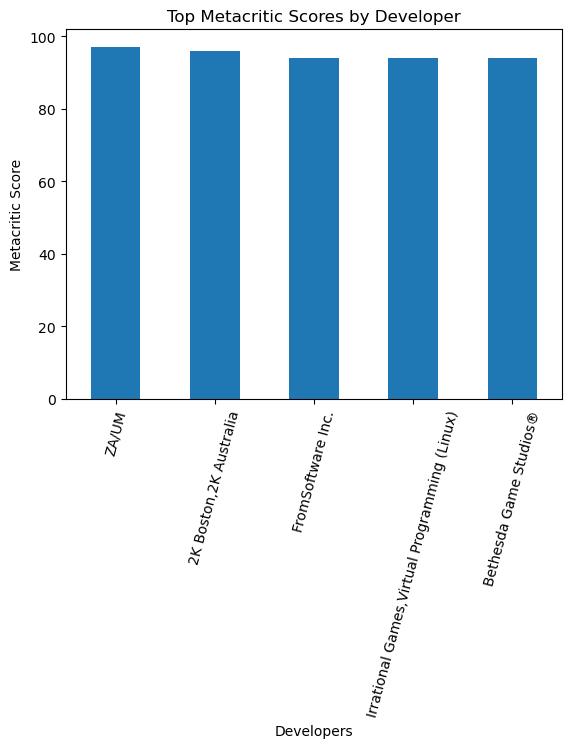

In [308]:
# find developers by sum of their estimated owners
dev_df = game_df.groupby("Developers")["Estimated Owners"].sum()

# find the mean of "Metacritic score" column for each developer
mean_df = top_scores_df.groupby("Developers")["Metacritic score"].mean().sort_values(ascending=False)

# Create a new DataFrame with "Estimated Owners" and "Metacritic score mean" columns
dev_mean_df = pd.DataFrame({'Estimated Owners': dev_df, 'Metacritic score mean': mean_df})

# Sort the DataFrame by "Estimated Owners" column in descending order
dev_mean_df = dev_mean_df.sort_values(by="Metacritic score mean", ascending=False)

# Print the top 15 rows of the updated DataFrame
#print(dev_mean_df.head(10))
top_df = mean_df.head(5)

top_graph = top_df.plot(kind="bar",x="Developers",y="Metacritic score mean")
plt.xticks(rotation=75)
plt.ylabel("Metacritic Score")
plt.title ("Top Metacritic Scores by Developer")
plt.show()

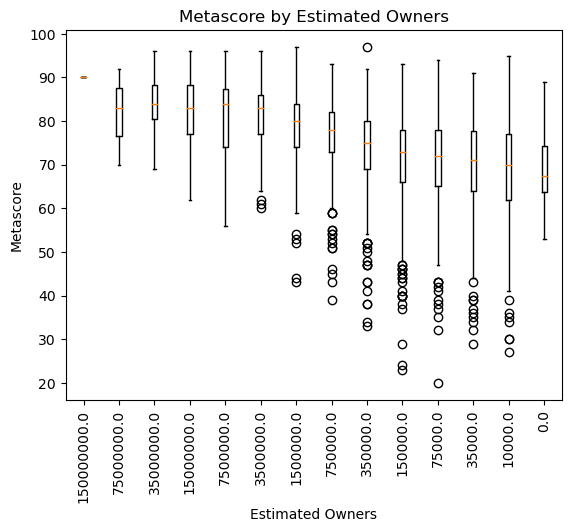

In [283]:
# Group top_scores_df by Estimated Owners
groups = top_scores_df.groupby("Estimated Owners")

# Sort groups by Estimated Owners from highest to lowest values
groups = sorted(groups, key=lambda x: x[0], reverse=True)

# Create a figure and axis object
fig, ax = plt.subplots()

# Iterate through groups and plot boxplots
for i, (name, group) in enumerate(groups):
    ax.boxplot(group["Metacritic score"], positions=[i+1])

# Add x-axis labels
plt.xticks(range(1, len(groups)+1), [name for name, group in groups], rotation=90)

# Add a title and y-axis label
plt.title('Metascore by Estimated Owners')
plt.ylabel('Metascore')
plt.xlabel('Estimated Owners')

# Show the plot
plt.show()

In [284]:
#find average'Metacritic score' by number of 'Estimated Owners' and order by 'Metacritic score'
owner_scores = top_scores_df.groupby("Estimated Owners")["Metacritic score"].mean().sort_values(ascending=False)
owner_scores

Estimated Owners
150000000.0    90.000000
35000000.0     83.500000
15000000.0     82.000000
75000000.0     81.666667
3500000.0      81.530612
7500000.0      80.634615
1500000.0      78.456446
750000.0       76.448819
350000.0       73.900156
150000.0       71.024014
75000.0        70.487280
35000.0        69.704981
0.0            68.642857
10000.0        68.519713
Name: Metacritic score, dtype: float64

In [292]:
#break out individual genres and join with top_scores_df
steam_genre_onehot_df = top_scores_df['Genres'].str.split(",").str.join('|').str.get_dummies()

In [293]:
top_genre_df = steam_genre_onehot_df.sum().sort_values(ascending=False)
top_genre_df.head(10)

Indie           2072
Action          1912
Adventure       1656
Strategy         926
RPG              804
Simulation       551
Casual           462
Racing           121
Sports           113
Free to Play      92
dtype: int64

In [295]:
#highest 'Metacritic score' by genre
big_genre_df = steam_genre_onehot_df.join(top_scores_df)
genre_scores = big_genre_df.groupby("Genres")["Metacritic score"].mean().sort_values(ascending=False)
genre_scores.head(10)

Genres
Action,Free to Play,Massively Multiplayer,RPG,Strategy    88.000000
Adventure,RPG,Strategy                                    87.500000
Casual,Indie,Racing,Sports                                87.000000
Action,Free to Play,Simulation,Strategy                   86.000000
Action,Adventure,Free to Play                             85.500000
Indie,Racing,Simulation,Sports                            85.000000
Massively Multiplayer,RPG                                 85.000000
Violent,Action,Adventure,RPG                              85.000000
Action,Free to Play,Strategy                              84.333333
Action,Adventure,Casual,Simulation,Strategy               84.000000
Name: Metacritic score, dtype: float64

Massively Multiplayer
0    72.775202
1    73.373333
Name: Metacritic score, dtype: float64
Indie
0    73.619965
1    72.098456
Name: Metacritic score, dtype: float64
RPG
0    72.580007
1    73.554726
Name: Metacritic score, dtype: float64
Sexual Content
0    72.786413
1    74.000000
Name: Metacritic score, dtype: float64
Free to Play
0    72.756296
1    74.021739
Name: Metacritic score, dtype: float64


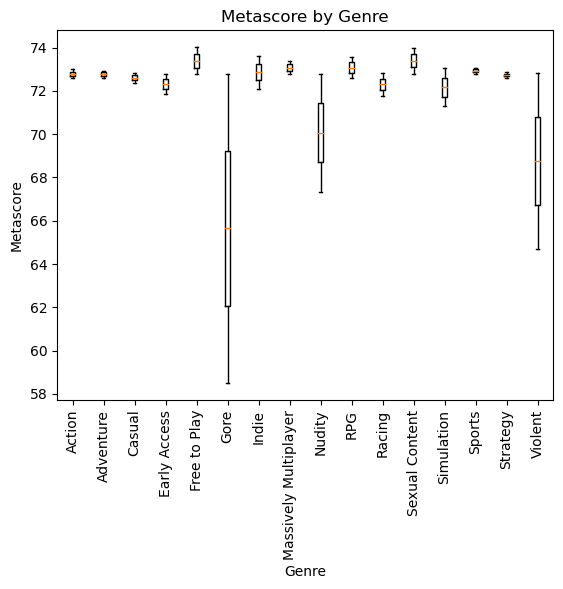

In [297]:
#group the top genres by 'Metacritic score'
action_df = big_genre_df.groupby(big_genre_df["Action"])["Metacritic score"].mean()
adventure_df = big_genre_df.groupby(big_genre_df["Adventure"])["Metacritic score"].mean()
casual_df = big_genre_df.groupby(big_genre_df["Casual"])["Metacritic score"].mean()
eacess_df = big_genre_df.groupby(big_genre_df["Early Access"])["Metacritic score"].mean()
free_df = big_genre_df.groupby(big_genre_df["Free to Play"])["Metacritic score"].mean()
gore_df = big_genre_df.groupby(big_genre_df["Gore"])["Metacritic score"].mean()
indie_df = big_genre_df.groupby(big_genre_df["Indie"])["Metacritic score"].mean()
multi_df = big_genre_df.groupby(big_genre_df["Massively Multiplayer"])["Metacritic score"].mean()
nude_df = big_genre_df.groupby(big_genre_df["Nudity"])["Metacritic score"].mean()
rpg_df = big_genre_df.groupby(big_genre_df["RPG"])["Metacritic score"].mean()
race_df = big_genre_df.groupby(big_genre_df["Racing"])["Metacritic score"].mean()
sex_df = big_genre_df.groupby(big_genre_df["Sexual Content"])["Metacritic score"].mean()
sim_df = big_genre_df.groupby(big_genre_df["Simulation"])["Metacritic score"].mean()
sport_df = big_genre_df.groupby(big_genre_df["Sports"])["Metacritic score"].mean()
strat_df = big_genre_df.groupby(big_genre_df["Strategy"])["Metacritic score"].mean()
vio_df = big_genre_df.groupby(big_genre_df["Violent"])["Metacritic score"].mean()

#make a dataframe of each of the top genres and their average 'Metacritic score'
big_tag_df = [action_df, adventure_df, casual_df, eacess_df,\
              free_df,gore_df,indie_df,multi_df,nude_df,rpg_df,race_df,\
             sex_df,sim_df,sport_df,strat_df,vio_df]

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot each df as a boxplot
for i in range(len(big_tag_df)):
    ax.boxplot(big_tag_df[i], positions=[i+1])

# Add x-axis labels
plt.xticks(range(1, len(big_tag_df)+1), ['Action', 'Adventure', 'Casual', 'Early Access', \
                                         'Free to Play', 'Gore', 'Indie', 'Massively Multiplayer', \
                                         'Nudity', 'RPG', 'Racing', 'Sexual Content', 'Simulation', \
                                         'Sports', 'Strategy', 'Violent'], rotation=90)

# Add a title and y-axis label
plt.title('Metascore by Genre')
plt.ylabel('Metascore')
plt.xlabel('Genre')

print(multi_df)
print(indie_df)
print(rpg_df)
print(sex_df)
print(free_df)
# Show the plot
plt.show()

In [286]:
#top games by average playtime
play_scores_df = top_scores_df.groupby(["Name","Average playtime forever"])\
.mean().sort_values(by="Average playtime forever",ascending=False)
play_scores_df.head()

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_49209/2840677721.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean().sort_values(by="Average playtime forever",ascending=False)


,,AppID,Peak CCU,Required age,Price,DLC count,Windows,Mac,Linux,Metacritic score,User score,...,Score rank,Achievements,Recommendations,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Estimated Owners,year,month,day
Name,Average playtime forever,,,,,,,,,,,,,,,,,,,,,
Brigade E5: New Jagged Union,42773,296210.0,2.0,0.0,3.99,0.0,1.0,0.0,0.0,41.0,0.0,...,NaN,0.0,0.0,0.0,42773.0,0.0,10000.0,2014.0,4.0,30.0
Dota 2,37162,570.0,558759.0,0.0,0.00,2.0,1.0,1.0,1.0,90.0,0.0,...,NaN,0.0,14300.0,1647.0,880.0,749.0,150000000.0,2013.0,7.0,9.0
Counter-Strike: Global Offensive,30484,730.0,825215.0,0.0,0.00,1.0,1.0,1.0,1.0,83.0,0.0,...,NaN,167.0,3441592.0,777.0,6357.0,253.0,75000000.0,2012.0,8.0,21.0
FINAL FANTASY XIV Online,27478,39210.0,31735.0,13.0,19.99,1.0,1.0,0.0,0.0,83.0,0.0,...,NaN,0.0,53578.0,1553.0,3248.0,1641.0,3500000.0,2014.0,2.0,18.0
Football Manager 2019,25933,872790.0,2193.0,0.0,0.00,0.0,1.0,1.0,0.0,86.0,0.0,...,NaN,77.0,7310.0,0.0,14356.0,0.0,1500000.0,2018.0,11.0,2.0


In [270]:
#find games with top average playtime and show average 'Metacritic score' 
play_scores_df = top_scores_df.groupby(["Name"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Average playtime forever",ascending=False)
play_scores_df.head(20)

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_49209/3670993133.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  play_scores_df = top_scores_df.groupby(["Name"])\


,Average playtime forever,Metacritic score
Name,,
Brigade E5: New Jagged Union,42773.0,41.0
Dota 2,37162.0,90.0
Counter-Strike: Global Offensive,30484.0,83.0
FINAL FANTASY XIV Online,27478.0,83.0
Football Manager 2019,25933.0,86.0
Football Manager 2020,22882.0,84.0
Rust,16623.0,69.0
Rocket League®,15653.0,86.0
PuzzleQuest: Challenge of the Warlords,14459.0,84.0


In [257]:
#metascore by publisher
pub_scores_df = top_scores_df.groupby(["Publishers"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Average playtime forever",ascending=False)
pub_scores_df.head(25)

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_49209/2327305142.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pub_scores_df = top_scores_df.groupby(["Publishers"])\


,Average playtime forever,Metacritic score
Publishers,,
Facepunch Studios,16623.000000,69.000000
Psyonix LLC,15653.000000,86.000000
Studio Wildcard,10660.000000,70.000000
Ludeon Studios,10424.000000,87.000000
Digital Extremes,9533.000000,69.000000
Bungie,9390.000000,83.000000
GIANTS Software,8804.000000,69.000000
Grinding Gear Games,8194.000000,86.000000
Pearl Abyss,8122.000000,73.000000


In [258]:
#metascore by developer
dev_scores_df = top_scores_df.groupby(["Developers","Name"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Metacritic score",ascending=False)
dev_scores_df.head(25)

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_49209/4179944963.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dev_scores_df = top_scores_df.groupby(["Developers","Name"])\


Average playtime forever  \
Developers                                   Name                                                                           
ATLUS                                        Persona 5 Royal                                                        381.0   
ZA/UM                                        Disco Elysium - The Final Cut                                          979.0   
2K Boston,2K Australia                       BioShock™                                                              345.0   
Rockstar North                               Grand Theft Auto V                                                   13650.0   
Valve                                        Half-Life                                                              459.0   
                                             Half-Life 2                                                            606.0   
                                             Portal 2                                                               437.0   
BioWare                                      Mass Effect 2 (2010)                                                  2759.0   
Bethesda Game Studios®                       The Elder Scrolls IV: Oblivion® Game of the Yea...                       0.0   
Bethesda Game Studios                        The Elder Scrolls V: Skyrim                                           6458.0   
                                             The Elder Scrolls IV: Oblivion® Game of the Yea...                    1522.0   
Firaxis Games                                Sid Meier's Civilization® IV                                           174.0   
BioWare                                      Mass Effect 2 (2010) Edition                                             0.0   
Irrational Games,Virtual Programming (Linux) BioShock Infinite                                                      719.0   
FromSoftware Inc.                            ELDEN RING                                                            5293.0   
id Software,Nightdive Studios,MachineGames   QUAKE                                                                  243.0   
Larian Studios                               Divinity: Original Sin - Enhanced Edition                             1876.0   
Santa Monica Studio                          God of War                                                            1855.0   
Relic Entertainment                          Company of Heroes - Legacy Edition                                     470.0   
                                             Company of Heroes                                                     1457.0   
Larian Studios                               Divinity: Original Sin 2 - Definitive Edition                         4120.0   
Rockstar Games                               Red Dead Redemption 2                                                 5776.0   
Supergiant Games                             Hades                                                                 2075.0   
Monstars Inc.,Resonair,Stage Games           Tetris® Effect: Connected                                             1350.0   
Epic Games, Inc.                             Unreal Tournament 2004: Editor's Choice Edition                        186.0   

                                                                                                 Metacritic score  
Developers                                   Name                                                                  
ATLUS                                        Persona 5 Royal                                                 97.0  
ZA/UM                                        Disco Elysium - The Final Cut                                   97.0  
2K Boston,2K Australia                       BioShock™                                                       96.0  
Rockstar North                               Grand Theft Auto V                                              96.0  
Valve                    

In [259]:
#metascore by price
price_scores_df = top_scores_df.groupby(["Price","Name"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Metacritic score",ascending=False)
price_scores_df.head(25)

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_49209/1578283993.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  price_scores_df = top_scores_df.groupby(["Price","Name"])\


Average playtime forever  \
Price Name                                                                           
39.99 Disco Elysium - The Final Cut                                          979.0   
59.99 Persona 5 Royal                                                        381.0   
0.00  Grand Theft Auto V                                                   13650.0   
      BioShock™                                                              345.0   
9.99  Half-Life                                                              459.0   
      Half-Life 2                                                            606.0   
      Portal 2                                                               437.0   
19.99 The Elder Scrolls V: Skyrim                                           6458.0   
9.99  QUAKE                                                                  243.0   
19.99 Sid Meier's Civilization® IV                                           174.0   
      The Elder Scrolls IV: Oblivion® Game of the Yea...                       0.0   
14.99 The Elder Scrolls IV: Oblivion® Game of the Yea...                    1522.0   
39.99 Divinity: Original Sin - Enhanced Edition                             1876.0   
7.50  Mass Effect 2 (2010) Edition                                             0.0   
59.99 ELDEN RING                                                            5293.0   
19.99 Mass Effect 2 (2010)                                                  2759.0   
29.99 BioShock Infinite                                                      719.0   
19.99 Company of Heroes                                                     1457.0   
      Company of Heroes - Legacy Edition                                     470.0   
39.99 Tetris® Effect: Connected                                             1350.0   
44.99 Divinity: Original Sin 2 - Definitive Edition                         4120.0   
39.99 The Witcher® 3: Wild Hunt                                             3696.0   
59.99 Half-Life: Alyx                                                        802.0   
29.99 Red Dead Redemption 2                                                 5776.0   
14.99 Unreal Tournament 2004: Editor's Choice Edition                        186.0   

                                                          Metacritic score  
Price Name                                                                  
39.99 Disco Elysium - The Final Cut                                   97.0  
59.99 Persona 5 Royal                                                 97.0  
0.00  Grand Theft Auto V                                              96.0  
      BioShock™                                                       96.0  
9.99  Half-Life                                                       96.0  
      Half-Life 2                                                     96.0  
      Portal 2                                                        95.0  
19.99 The Elder Scrolls V: Skyrim                                     94.0  
9.99  QUAKE                                                           94.0  
19.99 Sid Meier's Civilization® IV                                    94.0  
      The Elder Scrolls IV: Oblivion® Game of the Yea...              94.0  
14.99 The Elder Scrolls IV: Oblivion® Game of the Yea...              94.0  
39.99 Divinity: Original Sin - Enhanced Edition                       94.0  
7.50  Mass Effect 2 (2010) Edition                                    94.0  
59.99 ELDEN RING                                                      94.0  
19.99 Mass Effect 2 (2010)                                            94.0  
29.99 BioShock Infinite                                               94.0  
19.99 Company of Heroes                                               93.0  
      Company of Heroes - Legacy Edition                              93.0  
39.99 Tetris® Effect: Connected                                       93.0  
44.99 Divinity: Original Sin 2 - Definiti

In [260]:
#metascore by estimated owner
owner_scores_df = top_scores_df.groupby(["Estimated owners"])\
["Average playtime forever","Metacritic score"].mean().sort_values(by="Average playtime forever",ascending=False)
owner_scores_df.head(25)

/var/folders/_q/xkxllsdx27z2d9cg8mc1djpc0000gp/T/ipykernel_49209/3652253845.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  owner_scores_df = top_scores_df.groupby(["Estimated owners"])\


,Average playtime forever,Metacritic score
Estimated owners,,
100000000 - 200000000,37162.000000,90.000000
50000000 - 100000000,15944.000000,81.666667
20000000 - 50000000,7517.500000,83.500000
10000000 - 20000000,4403.291667,82.000000
5000000 - 10000000,3350.615385,80.634615
2000000 - 5000000,1940.668367,81.530612
1000000 - 2000000,1199.519164,78.456446
500000 - 1000000,823.601050,76.448819
200000 - 500000,526.330733,73.900156


In [261]:
owner_scores_df = owner_scores_df.rename(index={'100000000 - 200000000': '100M - 200M',\
                                                '50000000 - 100000000': '50M - 100M',\
                                                '20000000 - 50000000': '20M - 50M', \
                                                '10000000 - 20000000': '10M - 20M',\
                                               '5000000 - 10000000': '5M - 10M',\
                                               '2000000 - 5000000': '2M - 5M',\
                                               '1000000 - 2000000': '1M - 2M',\
                                               '500000 - 1000000': '500K - 1M',\
                                               '200000 - 500000': '200K - 500K',\
                                               '100000 - 200000': '100K - 200K',\
                                               '50000 - 100000': '50K - 100K',\
                                               '20000 - 50000': '20K - 50K',\
                                               '0 - 20000': '0 - 20K'})

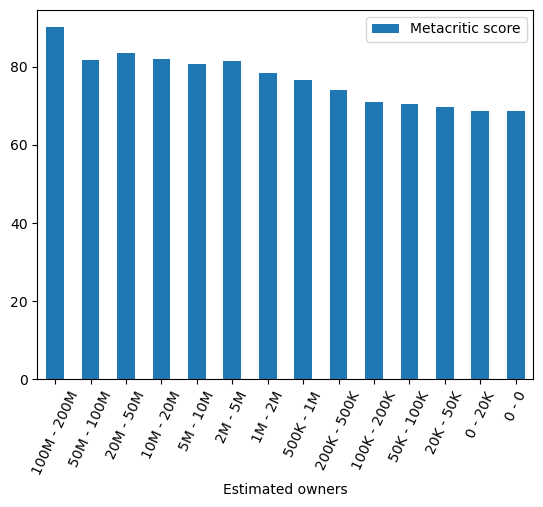

In [262]:
owner_scores_df.plot(kind='bar',y="Metacritic score")
plt.xticks(rotation=65)
plt.show()

In [70]:
play = top_scores_df['Average playtime two weeks']
score = top_scores_df['Metacritic score']
correlation = stats.pearsonr(play, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.09


In [69]:
price = top_scores_df['Price']
score = top_scores_df['Metacritic score']
correlation = stats.pearsonr(price, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.2


In [71]:
pos = top_scores_df['Positive']
score = top_scores_df['Metacritic score']
correlation = stats.pearsonr(pos, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.11


In [72]:
peak = top_scores_df['Peak CCU']
score = top_scores_df['Metacritic score']
correlation = stats.pearsonr(peak, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.07


In [74]:
steam_actual_tags_onehot_df = top_scores_df['Tags'].str.split(",").str.join('|').str.get_dummies()
big_tag_df = top_scores_df.join(steam_actual_tags_onehot_df)

In [76]:
sum_df = steam_actual_tags_onehot_df.sum().sort_values(ascending=False)
sum_df.head(10)

Singleplayer        2773
Action              2221
Adventure           2142
Indie               2001
Atmospheric         1392
Great Soundtrack    1280
Story Rich          1206
Multiplayer         1187
Strategy            1111
RPG                  976
dtype: int64

In [80]:
sing_tag_df = big_tag_df.groupby(["Singleplayer"])\
["Metacritic score"].mean().sort_values(ascending=False)
act_tag_df = big_tag_df.groupby(["Action"])\
["Metacritic score"].mean().sort_values(ascending=False)
adv_tag_df = big_tag_df.groupby(["Adventure"])\
["Metacritic score"].mean().sort_values(ascending=False)
ind_tag_df = big_tag_df.groupby(["Indie"])\
["Metacritic score"].mean().sort_values(ascending=False)



print(sing_tag_df)
print(act_tag_df)
print(adv_tag_df)
print(ind_tag_df)

Singleplayer
1    74.248467
0    68.782609
Name: Metacritic score, dtype: float64
Action
1    72.919856
0    72.598465
Name: Metacritic score, dtype: float64
Adventure
1    73.429972
0    71.948874
Name: Metacritic score, dtype: float64
Indie
0    73.759529
1    71.920040
Name: Metacritic score, dtype: float64


In [89]:
tag = big_tag_df['Singleplayer']
score = big_tag_df['Metacritic score']
correlation = stats.pearsonr(tag, score)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.23
